# 6.4 Supervised Machine Learning - Regression
### New York Citi Bikes

## 01 Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Set Path
path = r'C:\Users\cshat\09-2023 Citi Bikes Project'

In [3]:
# Import Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibike_clean.csv'), index_col = False)

## 02 Clean Data
Data was already cleaned during previous tasks. A few checks have been provided instead.

In [4]:
df.head()

,Unnamed: 0,day_of_week,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,5,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2


In [5]:
df.shape

(42975, 17)

In [6]:
df.isnull().sum()

Unnamed: 0                 0
day_of_week                0
start_hour                 0
start_time                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,gender
count,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000,42975.000000
mean,24966.306527,14.085678,437.238860,40.734477,-73.990947,434.608842,40.734070,-73.991241,770.459639,1975.693031,1.247772
std,14446.487376,4.933038,340.910199,0.019599,0.012368,332.861774,0.019601,0.012376,523.425686,10.903197,0.431831
min,0.000000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1934.000000,0.000000
25%,12444.500000,10.000000,304.000000,40.721101,-74.000040,305.000000,40.720828,-74.000271,395.000000,1968.000000,1.000000
50%,24957.000000,15.000000,402.000000,40.736245,-73.990765,402.000000,40.735877,-73.990985,621.000000,1978.000000,1.000000
75%,37486.500000,18.000000,485.000000,40.749718,-73.981923,483.000000,40.749013,-73.982578,999.000000,1984.000000,1.000000
max,49999.000000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,2.000000


## 03 Data Exploration
New variables will be created for this analysis.

In [8]:
# Change Date Data Type
df['start_time'] = df['start_time'].astype('datetime64[ns]')
df['end_time'] = df['end_time'].astype('datetime64[ns]')

In [9]:
# Create Count of Rides for Each Hour
hour_count = df.groupby(['start_hour',df['start_time'].dt.date])['start_time'].count()

In [10]:
hour_count

start_hour  start_time
0           2013-09-01    15
            2013-09-02    15
            2013-09-03     5
            2013-09-04     9
            2013-09-05    13
                          ..
23          2013-09-26    38
            2013-09-27    44
            2013-09-28    48
            2013-09-29    21
            2013-09-30    17
Name: start_time, Length: 711, dtype: int64

In [11]:
# Create Count of Rides for Each Day of Week
day_count = df.groupby('day_of_week')['start_time'].count().reset_index()

In [12]:
day_count

,day_of_week,start_time
0,Fri,6593
1,Mon,6796
2,Sat,4964
3,Sun,5501
4,Thu,6209
5,Tue,6425
6,Wed,6487


In [13]:
# Create Count of Rides for Each Hour and Day of Week
day_hour_count = df.groupby([ 'day_of_week','start_hour'])['start_time'].count()

In [14]:
day_hour_count

day_of_week  start_hour
Fri          0              48
             1              36
             2              23
             3              10
             4              10
                          ... 
Wed          19            479
             20            296
             21            213
             22            188
             23            103
Name: start_time, Length: 168, dtype: int64

In [15]:
# Create Average of Rides for Each Hour
avg_rides = hour_count.groupby('start_hour').mean().reset_index()

In [16]:
avg_rides

,start_hour,start_time
0,0,14.000000
1,1,8.866667
2,2,5.586207
3,3,3.692308
4,4,2.777778
5,5,6.724138
6,6,29.633333
7,7,65.966667
8,8,104.133333
9,9,86.600000


### Scatterplots

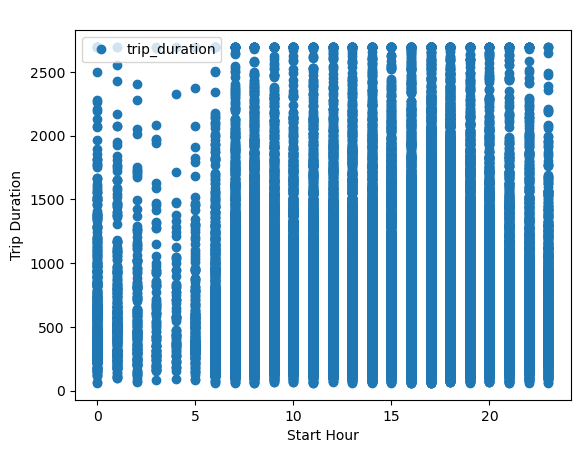

In [17]:
df.plot(x = 'start_hour', y='trip_duration',style='o')
plt.title(' ')  
plt.xlabel('Start Hour')  
plt.ylabel('Trip Duration')  
plt.show()

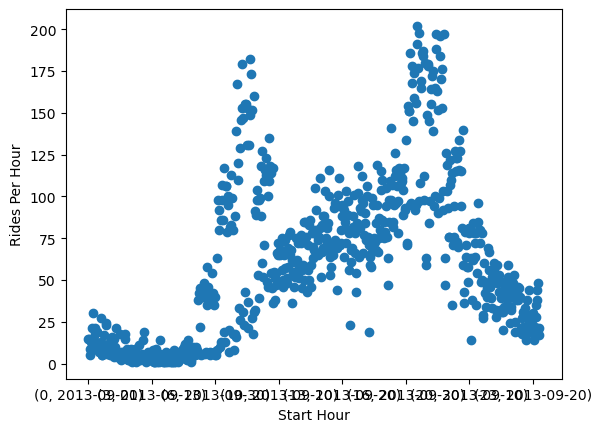

In [18]:
hour_count.plot(x ='start_hour', y='start_time', style='o') 
plt.title('')  
plt.xlabel('Start Hour')  
plt.ylabel('Rides Per Hour')  
plt.show()

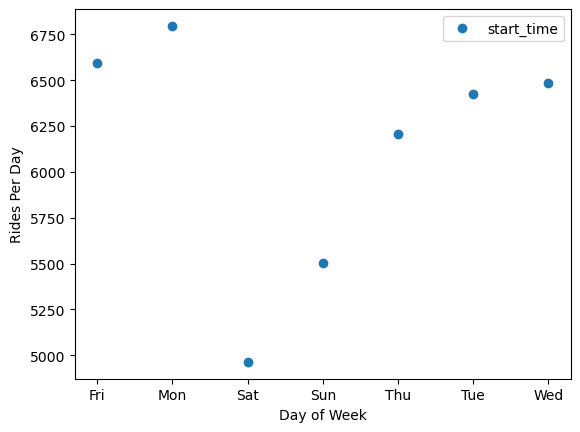

In [19]:
day_count.plot(x ='day_of_week', y='start_time', style='o') 
plt.title('')  
plt.xlabel('Day of Week')  
plt.ylabel('Rides Per Day')  
plt.show()

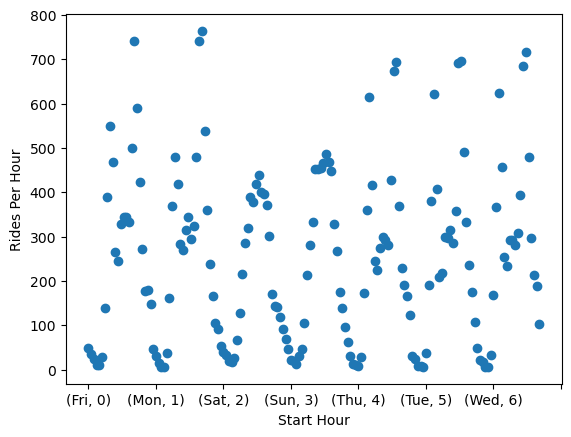

In [20]:
day_hour_count.plot(x ='start_hour', y='start_time', style='o') 
plt.title('')  
plt.xlabel('Start Hour')  
plt.ylabel('Rides Per Hour')  
plt.show()

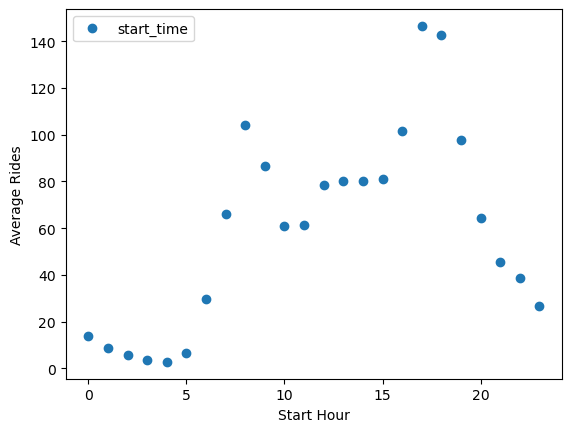

In [21]:
avg_rides.plot(x ='start_hour', y='start_time', style='o') 
plt.title('')  
plt.xlabel('Start Hour')  
plt.ylabel('Average Rides')  
plt.show()

### Hypothesis
The average number of rides will increase as the day progresses showing a postive trendline.

## 04 Regression

In [22]:
X = avg_rides['start_hour'].values.reshape(-1, 1)
y = avg_rides['start_time'].values.reshape(-1, 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [24]:
avgerage_rides = LinearRegression()

In [25]:
avgerage_rides.fit(X_train, y_train)

LinearRegression()

In [26]:
y_predicted = avgerage_rides.predict(X_test)

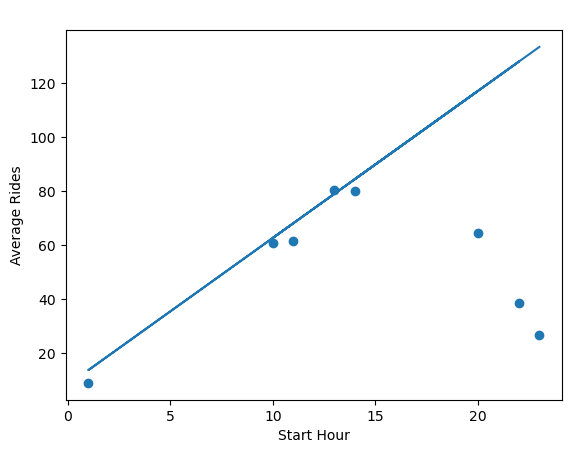

In [27]:
plot_test = plt
plot_test.scatter(X_test, y_test)
plot_test.plot(X_test, y_predicted)
plot_test.title(' ')
plot_test.xlabel('Start Hour')
plot_test.ylabel('Average Rides')
plot_test.show()

### Interpretation
The upward trend is as expected and shows that the average number of rides increases throughout the day. I don't know why this graph doesn't show all the data points that were in the scatterplot. Overall, the line appears to be a poor fit.

In [28]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [29]:
print('Slope:' ,avgerage_rides.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.44209036]]
Mean squared error:  2775.1675679273953
R2 score:  -3.853517189659499


In [30]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,61.366667,68.052273
1,60.766667,62.610182
2,38.633333,127.915267
3,80.033333,84.378544
4,64.333333,117.031086
5,8.866667,13.631369
6,80.266667,78.936453
7,26.766667,133.357357


### Compare Predicted and Actual Values
It is a poor fit. Some of the values are close but others are way off. I feel that the shape of this data is not well suited for linear regression.

## 05 Key Questions

### Who is using NYCB? Most/least common customer age, gender, and subscription status. Habit differences between customer demographics.
N/A

### When is NYCB being used? Most/least busy days of week and times of day.
Monday is the busiest day and Saturday is the least busiest day.
5-6PM is the busiest time and 3-4AM is the least busiest time.
There is a spike in the morning and afternoon that correlates with the start/end of typical working hours.

### Where is NYCB being used? Most/least popular stations.
N/A

### Descriptive statistics for each variable. Example: Average trip duration.
N/A

## 06 Conclusion
The goals of this task were completed but further analysis is still required to answer the key questions posed for this project.